In [34]:
import pandas as pd
import numpy as np
file_path = r"C:\Users\hansa\OneDrive\Desktop\internship\top_insta_influencers_data.xlsx"
df = pd.read_excel(file_path)
print(df.head())
print("Shape of dataset:", df.shape)
print("\nData Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nSummary Statistics:")
print(df.describe(include='all'))

   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0          0.0139              6.5m       29.0b          Spain  
1          0.0162              5.9m       57.4b  United States  
2          0.0124              4.4m        6.0b            NaN  
3          0.0097              3.3m       11.5b  United States  
4           0.002            665.3k       12.5b  United States  
Shape of dataset: (200, 10)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ----

In [35]:
print("Shape before dropping duplicates:", df.shape)
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

Shape before dropping duplicates: (200, 10)
Shape after dropping duplicates: (200, 10)


In [36]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
for col in cat_cols:
     if df[col].isnull().sum() > 0:
           df[col] = df[col].fillna(df[col].mode()[0])

In [37]:
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
rank                 0
channel_info         0
influence_score      0
posts                0
followers            0
avg_likes            0
60_day_eng_rate      0
new_post_avg_like    0
total_likes          0
country              0
dtype: int64


In [38]:
def convert_to_number(value):
       if isinstance(value, str):
             value = value.lower().replace(',', '').strip()
             if value.endswith('k'):
                   return float(value[:-1]) * 1e3
             elif value.endswith('m'):
                   return float(value[:-1]) * 1e6
             elif value.endswith('b'):
                   return float(value[:-1]) * 1e9
             else:
                   try:
                           return float(value)
                   except:
                          return np.nan
       return value             

In [39]:
columns_to_convert = ['posts', 'followers', 'avg_likes', 'new_post_avg_like', 'total_likes']
for col in columns_to_convert:
       df[col] = df[col].apply(convert_to_number)
print("\nData types after conversion:")
print(df[columns_to_convert].dtypes)


Data types after conversion:
posts                float64
followers            float64
avg_likes            float64
new_post_avg_like    float64
total_likes          float64
dtype: object


In [40]:
print("\nSample converted values:")
print(df[columns_to_convert].head())


Sample converted values:
    posts    followers  avg_likes  new_post_avg_like   total_likes
0  3300.0  475800000.0  8700000.0          6500000.0  2.900000e+10
1  6900.0  366200000.0  8300000.0          5900000.0  5.740000e+10
2   890.0  357300000.0  6800000.0          4400000.0  6.000000e+09
3  1800.0  342700000.0  6200000.0          3300000.0  1.150000e+10
4  6800.0  334100000.0  1900000.0           665300.0  1.250000e+10


In [41]:
cleaned_path = r"C:\Users\hansa\OneDrive\Desktop\internship\top_insta_influencers_cleaned.csv"
df.to_csv(cleaned_path, index=False)
print(f"\n✅ Cleaned dataset saved successfully at:\n{cleaned_path}")


✅ Cleaned dataset saved successfully at:
C:\Users\hansa\OneDrive\Desktop\internship\top_insta_influencers_cleaned.csv


In [42]:
import pandas as pd
file_path = r"C:\Users\hansa\OneDrive\Desktop\internship\top_insta_influencers_cleaned.csv"
df = pd.read_csv(file_path)
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
sns.set(style='whitegrid')

In [44]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             rank  influence_score         posts     followers     avg_likes  \
count  200.000000       200.000000    200.000000  2.000000e+02  2.000000e+02   
mean   100.500000        81.820000   3499.850000  7.740950e+07  1.787104e+06   
std     57.879185         8.878159   3475.828158  7.368727e+07  2.193359e+06   
min      1.000000        22.000000     10.000000  3.280000e+07  6.510000e+04   
25%     50.750000        80.000000    947.500000  4.000000e+07  5.044000e+05   
50%    100.500000        84.000000   2100.000000  5.005000e+07  1.100000e+06   
75%    150.250000        86.000000   5025.000000  6.890000e+07  2.100000e+06   
max    200.000000        93.000000  17500.000000  4.758000e+08  1.540000e+07   

       new_post_avg_like   total_likes  
count       2.000000e+02  2.000000e+02  
mean        1.208132e+06  3.658112e+09  
std         1.858322e+06  5.561939e+09  
min         0.000000e+00  1.830000e+07  
25%         1.957500e+05  9.968500e+08  
50%         

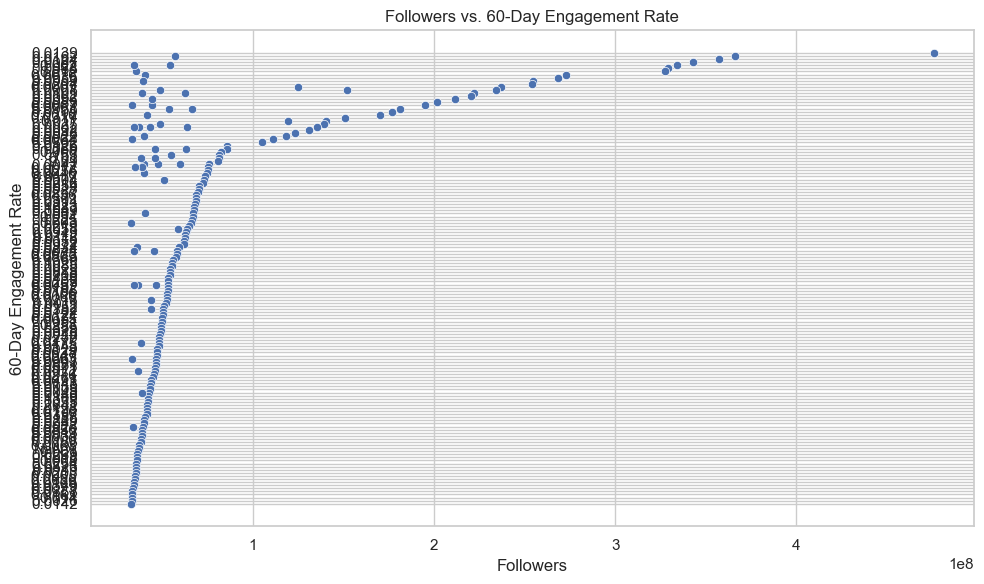

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='followers', y='60_day_eng_rate')
plt.title("Followers vs. 60-Day Engagement Rate")
plt.xlabel("Followers")
plt.ylabel("60-Day Engagement Rate")
plt.tight_layout()
plt.show()

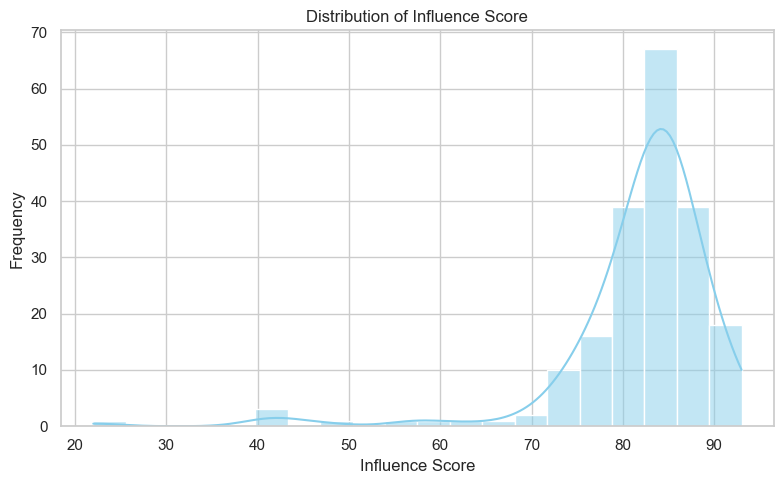

In [46]:
plt.figure(figsize=(8,5))
sns.histplot(df['influence_score'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Influence Score")
plt.xlabel("Influence Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

C:\Users\hansa\AppData\Local\Temp\ipykernel_12688\1885739266.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


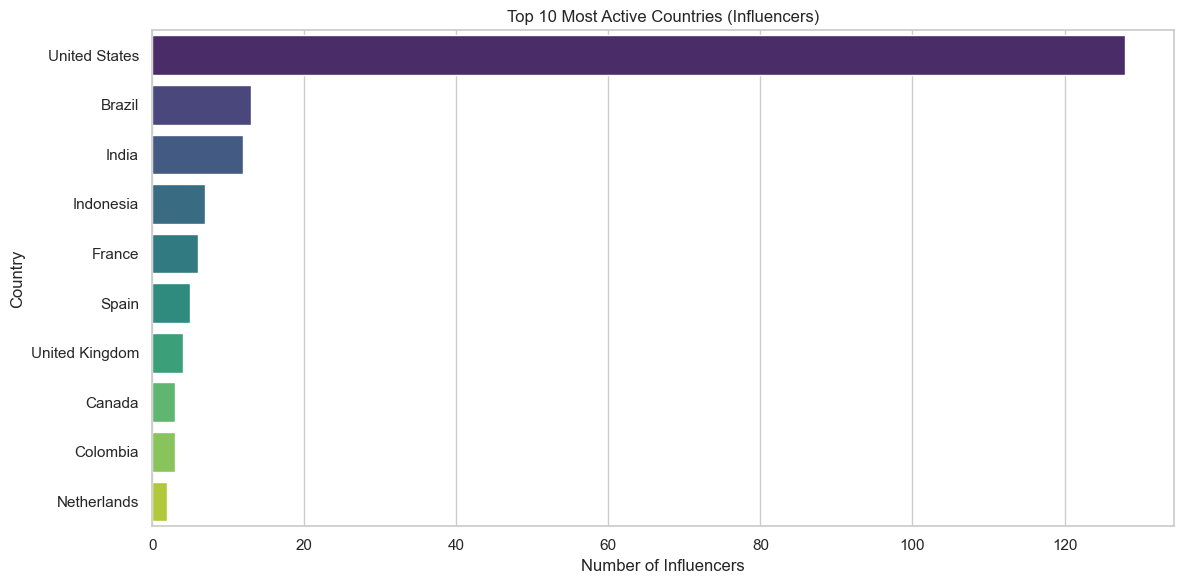

In [47]:
plt.figure(figsize=(12,6))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Most Active Countries (Influencers)")
plt.xlabel("Number of Influencers")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [48]:
df['like_follower_ratio'] = df['total_likes'] / df['followers']
df['post_follower_ratio'] = df['posts'] / df['followers']
df['avg_likes_ratio'] = df['avg_likes'] / df['followers']
print("\nNewly Created Features (first 5 rows):")
print(df[['like_follower_ratio', 'post_follower_ratio', 'avg_likes_ratio']].head())


Newly Created Features (first 5 rows):
   like_follower_ratio  post_follower_ratio  avg_likes_ratio
0            60.949979             0.000007         0.018285
1           156.744948             0.000019         0.022665
2            16.792611             0.000002         0.019032
3            33.557047             0.000005         0.018092
4            37.413948             0.000020         0.005687


In [49]:
if __name__ == "__main__":
     import pandas as pd
     import matplotlib.pyplot as plt
     import seaborn as sns
     from sklearn.model_selection import train_test_split
     from sklearn.linear_model import LinearRegression
     from sklearn.metrics import mean_squared_error, r2_score
     df = pd.read_csv(r"C:\Users\hansa\OneDrive\Desktop\internship\top_insta_influencers_cleaned.csv")
     df['60_day_eng_rate'] = df['60_day_eng_rate'].str.replace('%', '').replace('NaN', '0').astype(float)

     X = df.drop(['influence_score', 'rank', 'channel_info'], axis=1)
     X = pd.get_dummies(X, columns=['country'], drop_first=True)
     y = df['influence_score']
     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

     model = LinearRegression()
     model.fit(X_train, y_train)

     y_pred = model.predict(X_test)

In [50]:

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 13.257804886557636
